In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import itertools
import cv2
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [91]:
df = pd.read_csv('GroundTruth.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'GroundTruth.csv'

In [ ]:
df.shape

In [ ]:
pwd

In [ ]:
imagesDir = os.listdir("Images")

In [ ]:
os.chdir("Images")

In [ ]:
pwd

In [ ]:
image = cv2.imread(imagesDir[876])

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

In [ ]:
images = []

In [ ]:
imagesArray = df["image"].to_numpy()

In [ ]:
for id in imagesArray:
    path = id + ".jpg"
    image = cv2.imread(path)
    images.append(image)

In [ ]:
len(images)

In [ ]:
imagesNP = np.array(images)

In [ ]:
np.save("Images.npy", imagesNP)

In [92]:
pwd

'C:\\Users\\DELL\\Desktop\\imageiden\\Images'

In [93]:
imagesArray = np.load("Images.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'Images.npy'

In [ ]:
imagesArray

In [ ]:
imagesArray.shape

In [ ]:
imagesArray[0].shape

In [ ]:
df.drop(columns=["image"], inplace=True)

In [ ]:
df.head()

In [ ]:
classes = df.to_numpy()

In [ ]:
classes

In [ ]:
classes.shape

In [ ]:
imagesArray[0]

In [ ]:
def processImage(image):
    image = cv2.resize(image, (150, 200))
    image = image.astype("float32") / 255
    return image

In [ ]:
image = processImage(imagesArray[0])

In [ ]:
image.shape

In [ ]:
image

In [ ]:
plt.imshow(image)

In [ ]:
inputs = []

In [ ]:
for image in imagesArray:
    img = processImage(image)
    inputs.append(img)

In [ ]:
inputs = np.array(inputs)

In [ ]:
inputs.shape

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(inputs, classes, test_size = 0.2, random_state = 30)

In [ ]:
xTrain.shape

In [ ]:
yTrain.shape

In [ ]:
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size = 0.2, random_state = 30)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(200, 150, 3)))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["Accuracy"])

In [ ]:
history = model.fit(xTrain, yTrain, validation_data = [xVal, yVal], epochs = 10, batch_size = 32)

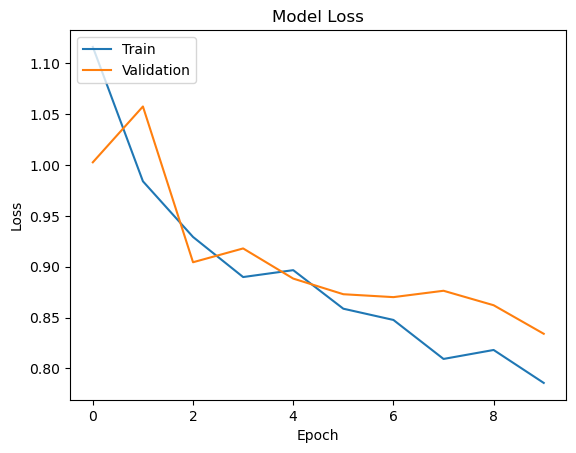

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [73]:
model.evaluate(xTest, yTest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 334ms/step - Accuracy: 0.7038 - loss: 0.8345


[0.8321588635444641, 0.6979530453681946]

In [74]:
predictions = model.predict(xTest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 321ms/step


In [75]:
predictions

array([[3.39549899e-01, 5.71598470e-01, 1.74771209e-04, ...,
        8.75089467e-02, 2.58150685e-05, 9.60533271e-06],
       [8.77719000e-02, 3.49876165e-01, 1.03526324e-01, ...,
        3.88951063e-01, 1.96734015e-02, 4.89512505e-03],
       [4.82488610e-02, 9.13307726e-01, 2.57452066e-05, ...,
        3.76222096e-02, 1.22303773e-05, 6.05114219e-05],
       ...,
       [4.89423908e-02, 1.82239562e-01, 2.21960798e-01, ...,
        3.78910780e-01, 2.73944624e-02, 7.34701939e-03],
       [1.75578088e-01, 7.82399297e-01, 4.99515882e-05, ...,
        4.18269560e-02, 3.89314528e-06, 2.52914651e-06],
       [1.13080941e-05, 9.99881625e-01, 6.12782847e-09, ...,
        1.06939042e-04, 2.45265834e-08, 7.57186935e-09]], dtype=float32)

In [85]:
predictions[0]

array([3.3954990e-01, 5.7159847e-01, 1.7477121e-04, 1.1325136e-03,
       8.7508947e-02, 2.5815069e-05, 9.6053327e-06], dtype=float32)

In [86]:
pred = np.zeros_like(predictions)
pred[np.arange(len(predictions)), predictions.argmax(axis=1)] = 1

In [87]:
pred

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [88]:
from sklearn.metrics import classification_report
report = classification_report(yTest, pred)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
print(report)

              precision    recall  f1-score   support

           0       0.53      0.09      0.16       217
           1       0.79      0.93      0.85      1347
           2       0.34      0.09      0.14       109
           3       0.00      0.00      0.00        69
           4       0.32      0.53      0.40       206
           5       0.00      0.00      0.00        22
           6       1.00      0.27      0.43        33

   micro avg       0.70      0.70      0.70      2003
   macro avg       0.43      0.27      0.28      2003
weighted avg       0.66      0.70      0.65      2003
 samples avg       0.70      0.70      0.70      2003

